<a href="https://colab.research.google.com/github/saritmaitra/Momentum/blob/main/RSI_%26_MA_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
import matplotlib.gridspec as gridspec
import pandas as pd
from pandas.tseries.offsets import MonthEnd
pd.options.mode.chained_assignment = None
pd.set_option('use_inf_as_na', True)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2020-12-23  28.180000  28.865999  27.910000  28.020000  28.020000  125400
2020-12-24  28.000000  28.000000  26.959999  27.820000  27.820000   94600
2020-12-28  28.049999  28.370001  27.280001  28.010000  28.010000  168000
2020-12-29  28.330000  29.129999  27.624001  28.889999  28.889999  226400
2020-12-30  29.150000  29.459999  27.530001  28.219999  28.219999  324000


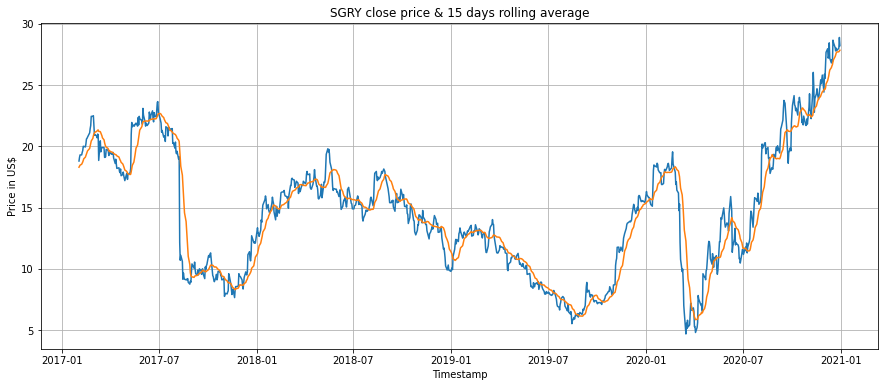

In [ ]:
ticker = "SGRY"
start_date = dt.datetime(2010,12,31)
end_date = dt.datetime(2020,12,31)
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data = yf.download(ticker, start = start_date, end =end_date )
    self.df = pd.DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 5]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 1000)
df = db.quote()
print(df.tail())

df['MA_15'] = df['Adj Close'].rolling(window=15).mean()
df.dropna(inplace=True)

plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize = (15,6))
ax1.set_ylabel("Price in US$")
ax1.set_xlabel("Timestamp")
ax1.plot('Adj Close', data=df, label = "Adj Close Price")
ax1.plot('MA_15', data=df, label = "3 weeks MA"); plt.grid(True)
ax1.set_title('SGRY close price & 15 days rolling average')
plt.show()

In [ ]:
df['price_change'] = df['Adj Close'].pct_change()
df = df.dropna()

# https://www.macroption.com/rsi/ 

df['up_move'] = df['price_change'].apply(lambda x: x if x > 0 else 0)
df['down_move'] = df['price_change'].apply(lambda x: abs(x) if x < 0 else 0)

df['avg_up'] = df['up_move'].ewm(span=19).mean()
df['avg_down'] = df['down_move'].ewm(span=19).mean()
df = df.dropna()

df['RS'] = df['avg_up'] / df['avg_down']
df = df.dropna()
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

df.loc[(df['Adj Close'] > df['MA_15']) & (df['RSI'] > 30), "BUY"] = 'YES'
df.loc[(df['Adj Close'] < df['MA_15']) | (df['RSI'] < 30), "BUY"] = 'NO'
df

,Open,High,Low,Close,Adj Close,Volume,MA_15,price_change,up_move,down_move,avg_up,avg_down,RS,RSI,BUY
Date,,,,,,,,,,,,,,,
2017-02-13,20.049999,20.400000,19.900000,19.950001,19.950001,141100,19.120000,-0.002500,0.000000,0.002500,0.007029,0.000439,16.012799,94.122072,YES
2017-02-14,19.950001,20.450001,19.900000,20.200001,20.200001,146200,19.243333,0.012531,0.012531,0.000000,0.007927,0.000367,21.582363,95.571765,YES
2017-02-15,20.200001,20.850000,19.955999,20.600000,20.600000,90500,19.340000,0.019802,0.019802,0.000000,0.009750,0.000311,31.361258,96.909885,YES
2017-02-16,20.500000,20.799999,20.350000,20.650000,20.650000,146500,19.483333,0.002427,0.002427,0.000000,0.008683,0.000266,32.693047,97.032029,YES
2017-02-17,20.600000,20.850000,20.450001,20.750000,20.750000,159700,19.630000,0.004843,0.004843,0.000000,0.008148,0.000229,35.645467,97.271150,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,28.180000,28.865999,27.910000,28.020000,28.020000,125400,27.616667,0.008276,0.008276,0.000000,0.013576,0.009137,1.485863,59.772527,YES
2020-12-24,28.000000,28.000000,26.959999,27.820000,27.820000,94600,27.699333,-0.007138,0.000000,0.007138,0.012219,0.008937,1.367192,57.755851,YES
2020-12-28,28.049999,28.370001,27.280001,28.010000,28.010000,168000,27.721333,0.006830,0.006830,0.000000,0.011680,0.008043,1.452102,59.218660,YES


In [ ]:
pd.value_counts(df.BUY)

YES    509
NO     469
Name: BUY, dtype: int64

In [ ]:
PnL = []

for i in range(len(df) - 12):
  if "YES" in df['BUY'].iloc[i]:
    for j in range(1,11):
      if df['RSI'].iloc[i+j] > 40:
        PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
        break
      if df['RSI'].iloc[i+j] < 40:
        PnL.append(df['Open'].iloc[i+12] - df['Open'].iloc[i+1])
        break

PnL

[0.25,
 0.2999992370605469,
 0.10000038146972656,
 0.2999992370605469,
 0.25,
 0.4500007629394531,
 -0.10000038146972656,
 1.1000003814697266,
 -0.10000038146972656,
 0.25,
 -1.1499996185302734,
 -0.7000007629394531,
 -1.5,
 0.10000038146972656,
 0.14999961853027344,
 3.049999237060547,
 0.8500003814697266,
 -0.2999992370605469,
 0.25,
 -0.5,
 0.5,
 0.049999237060546875,
 0.14999961853027344,
 -0.39999961853027344,
 0.75,
 -0.6000003814697266,
 0.6000003814697266,
 -0.1999988555908203,
 0.0,
 -0.4500007629394531,
 -0.4500007629394531,
 -0.7999992370605469,
 -0.35000038146972656,
 -0.4499988555908203,
 0.6999988555908203,
 0.3000011444091797,
 -0.9000015258789062,
 -0.25,
 -0.3000011444091797,
 -0.09999847412109375,
 0.75,
 0.5499992370605469,
 -0.049999237060546875,
 -0.8500003814697266,
 -0.5500011444091797,
 -0.3000011444091797,
 -0.25,
 0.1999988555908203,
 -10.69999885559082,
 0.6499996185302734,
 -0.2999992370605469,
 0.34999942779541016,
 -0.5,
 -0.09999942779541016,
 -0.10000038

In [ ]:
len([i for i in PnL if i > 0])
len(PnL)
# winning rate
print(len([i for i in PnL if i > 0]) / len(PnL))

0.4949698189134809


## Function to calculate RSI

In [15]:
tickers=["SGRY", "NTRA", "Z", "FATE", "DIS", "GM", 'BPMC', "PTC"]
start_date = dt.datetime(2015,12,31)
end_date = dt.datetime(2020,12,31)

def RSI_calculation(symbol):
  data = yf.download(tickers[0], start = start_date)
  data['MA_15'] = data['Adj Close'].rolling(window=15).mean()
  data['price_change'] = data['Adj Close'].pct_change()
  data['up_move'] = data['price_change'].apply(lambda x: x if x > 0 else 0)
  data['down_move'] = data['price_change'].apply(lambda x: abs(x) if x < 0 else 0)
  data['avg_up'] = data['up_move'].ewm(span=19).mean()
  data['avg_down'] = data['down_move'].ewm(span=19).mean()
  data = data.dropna()
  data['RS'] = data['avg_up'] / data['avg_down']
  data['RSI'] = data['RS'].apply(lambda x: 100 - (100/(x+1)))
  data.loc[(data['Adj Close'] > data['MA_15']) & (data['RSI'] > 30), "BUY"] = 'YES'
  data.loc[(data['Adj Close'] < data['MA_15']) | (data['RSI'] < 30), "BUY"] = 'NO'
  return (data)

def get_signals(data):
  buy_date = []
  sell_date = []

  for i in range(len(data) - 11):
    if "YES" in data['BUY'].iloc[i]:
      buy_date.append(data.iloc[i+1].name)
      for j in range(1,11):
        if data['RSI'].iloc[i+j] > 40:
          sell_date.append(data.iloc[i+j+1].name)
          break
        elif j == 10:
          sell_date.append(data.iloc[i+j+1].name)

  return (buy_date, sell_date)

dataframe = RSI_calculation(tickers[0])
buy, sell = get_signals(dataframe)


[*********************100%***********************]  1 of 1 completed


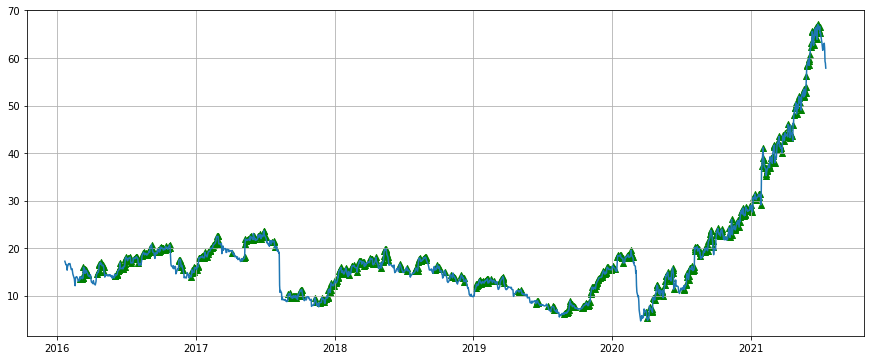

In [16]:
plt.figure(figsize = (15,6))
plt.scatter(dataframe.loc[buy].index, dataframe.loc[buy]['Adj Close'], 
            marker = '^', c = 'g')
plt.plot(dataframe['Adj Close'])
plt.grid(True); plt.show()

In [17]:
profits = (dataframe.loc[sell].Open.values - dataframe.loc[buy].Open.values) / dataframe.loc[sell].Open.values
len([i for i in profits if i > 0]) / len(profits)

0.5

In [18]:
len(profits)

770

In [20]:
matrix_signals = []
matrix_profit = []

for i in range(len(tickers)):
  dataframe = RSI_calculation(tickers[i])
  buy, sell = get_signals(dataframe)
  profits = (dataframe.loc[sell].Open.values - dataframe.loc[buy].Open.values) / dataframe.loc[sell].Open.values
  matrix_signals.append(buy)
  matrix_profit.append(profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
final_profit = []

for i in matrix_profit:
  for e in i:
    final_profit.append(e)

final_profit

[-0.028888914320203993,
 0.01079917699762323,
 0.0595802360979858,
 -0.0812591963946363,
 0.1964705972110524,
 -0.06985523176175931,
 -0.022522547125411425,
 -0.06220094602144744,
 0.03939589270055277,
 -0.014656849433697907,
 0.022786421589746562,
 -0.044187601417039445,
 -0.0054682107368603985,
 -0.03611899667247359,
 0.008310241623697937,
 0.03669114070265503,
 -0.0040187183332864905,
 0.030519436688099567,
 0.06097561117441157,
 0.01145271442495911,
 0.026408494058788423,
 -0.015494649478099195,
 -0.002389540984125823,
 -0.01516070366707154,
 -0.012277399898743093,
 -0.0006142646474234568,
 -0.0130678902183754,
 -0.06494364031323492,
 -0.021067429463259495,
 -0.001406434860323266,
 0.004201643351844722,
 0.004184129635861346,
 0.013076365029254435,
 0.04721313226418417,
 -0.009265410092904039,
 0.028295853933158286,
 0.03296018255509041,
 0.03190852902890351,
 -0.03877428693609308,
 -0.009469672795790154,
 0.0018903423558616207,
 -0.005066492963858521,
 -0.00253968011765253,
 -0.04

In [22]:
wins = [i for i in final_profit if i > 0]
len(wins) / len(final_profit)

0.5

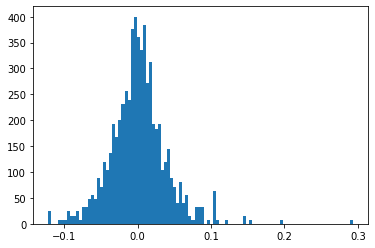

In [23]:
plt.hist(final_profit, bins=100)
plt.show()

## Signals obtained in 2021

In [24]:
for i in matrix_signals:
  for e in i:
    if e.year == 2021:
      print(e)

2021-01-04 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-11 00:00:00
2021-01-12 00:00:00
2021-01-13 00:00:00
2021-01-14 00:00:00
2021-01-15 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-29 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-16 00:00:00
2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00
2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00
2021-03-02 00:00:00
2021-03-03 00:00:00
2021-03-04 00:00:00
2021-03-09 00:00:00
2021-03-10 00:00:00
2021-03-11 00:00:00
2021-03-12 00:00:00
2021-03-15 00:00:00
2021-03-16 00:00:00
2021-03-17 00:00:00
2021-03-18 00:00:00
2021-03-19 00:00:00
2021-03-23 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
